In [61]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [62]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape


(50000, 32, 32, 3)

In [63]:
X_test.shape

(10000, 32, 32, 3)

In [64]:
y_train.shape

(50000, 1)

In [65]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [66]:
y_train=y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [67]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [68]:
def plot_sample(X,y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

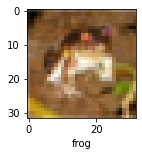

In [69]:
plot_sample(X_train, y_train, 0)

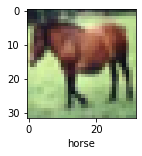

In [70]:
plot_sample(X_train,y_train,7)

In [71]:
X_train=X_train /255.0
X_test=X_test /255.0

Build simple artificial neural network for image classification

In [75]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.8121 - accuracy: 0.3542
Epoch 2/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.6225 - accuracy: 0.4282
Epoch 3/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.5404 - accuracy: 0.4562
Epoch 4/5
1563/1563 [==============================] - 71s 46ms/step - loss: 1.4807 - accuracy: 0.4767
Epoch 5/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.4309 - accuracy: 0.4969


In [76]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 6s 19ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.40      0.50      1000
           1       0.55      0.60      0.57      1000
           2       0.52      0.14      0.22      1000
           3       0.31      0.46      0.37      1000
           4       0.46      0.39      0.42      1000
           5       0.58      0.14      0.23      1000
           6       0.51      0.60      0.55      1000
           7       0.48      0.58      0.53      1000
           8       0.59      0.58      0.58      1000
           9       0.36      0.77      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.45     10000
weighted avg       0.50      0.47      0.45     10000



build a convolutional neural network to train our images

In [77]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [78]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [79]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.4617 - accuracy: 0.4761
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1204 - accuracy: 0.6086
Epoch 3/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9881 - accuracy: 0.6579
Epoch 4/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.9075 - accuracy: 0.6849
Epoch 5/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8383 - accuracy: 0.7081
Epoch 6/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.7872 - accuracy: 0.7253
Epoch 7/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7319 - accuracy: 0.7448
Epoch 8/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.6927 - accuracy: 0.7594
Epoch 9/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6520 - accuracy: 0.7722
Epoch 10/10
1563/1563 [==============================] - 49s 31m

In [44]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.9340 - accuracy: 0.6996


[0.9340226650238037, 0.6995999813079834]

In [45]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[8.0972386e-05, 6.0405769e-06, 2.5119304e-04, 9.8720378e-01,
        1.2230792e-04, 1.1882833e-02, 6.7394547e-05, 2.6738235e-06,
        3.7921366e-04, 3.6520491e-06],
       [2.7786792e-04, 1.5266844e-02, 4.2369879e-06, 1.7874494e-06,
        8.6768442e-10, 1.1717383e-08, 1.0339528e-08, 6.3819622e-10,
        9.8435313e-01, 9.5967065e-05],
       [1.1739937e-01, 6.3841805e-02, 4.9767201e-04, 1.5575911e-03,
        1.2915015e-03, 1.9519837e-04, 2.1628868e-05, 5.7650061e-04,
        7.9301697e-01, 2.1601792e-02],
       [9.1107917e-01, 9.6289720e-03, 1.7350730e-03, 1.9277394e-02,
        6.8755727e-03, 9.6830318e-04, 5.0496467e-04, 2.9787331e-04,
        4.9342845e-02, 2.8980497e-04],
       [9.1020871e-07, 9.5004798e-06, 8.6654514e-02, 1.1628035e-02,
        2.6819646e-01, 1.1672353e-03, 6.3233125e-01, 1.5131486e-06,
        5.5710057e-06, 5.0526055e-06]], dtype=float32)

In [46]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [59]:
y_test=y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

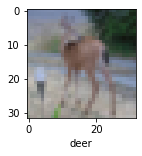

In [60]:
plot_sample(X_test, y_test,100)

In [57]:
classes[y_classes[100]]

'deer'

In [58]:
classes[y_classes[100]]


'deer'